# Metody inteligencji obliczeniowej - Sprawozdanie 9

## Uczenie nadzorowane - inne algorytmy.
### Yuliya Zviarko, 17.05.2025

# Wprowadzenie

Na ostatnich laboratoriach poznaliśmy kolejne algorytmy, które znajdują zastosowanie zarówno w zadaniach klasyfikacji, jak i regresji (aproksymacji).

Były to:
- Drzewa decyzyjne,
- Lasy losowe,
- Maszyny wektorów nośnych,
- Metoda k najbliższych sąsiadów.

Naszym celem na zajęciach było porównanie wszystkich algorytmów w praktyce oraz zbadanie ich skuteczności.

# Zadanie 1

W pierwszym zadaniu należało pobrać pliki set1.csv oraz set2.csv. Celem było zaproponowanie klasyfikatora opartego na każdym z omówionych we wprowadzeniu algorytmów oraz na sieci neuronowej wielowarstwowej.
Należało:
- porównać otrzymane wyniki między sobą,
- przedstawić przebieg klasyfikacji na wykresach dla każdego przypadku,
- na koniec wybrać najlepszy model.

Rozpoczynam od pobrania plików wskazanych w treści zadania. Po ich odczytaniu przypisuję zawartość do zmiennych **data1** i **data2**, które będą reprezentować nasze zbiory danych.

In [ ]:
import pandas as pd

data1 = pd.read_csv('set1.csv')
data2 = pd.read_csv('set2.csv')
# print(data1)
# print(data2)

Do x1 przypisałam cechy ze zbioru data1, natomiast do y1 - etykiety klas odpowiadające każdemu punktowi w x1. W ten sam sposób postąpiłam z x2 i y2, używając danych z drugiego zbioru (data2).

Następnie dokonałem podziału danych wejściowych (cech) i odpowiadających im etykiet klas na zbiór treningowy i testowy, zachowując proporcje 80/20.

In [ ]:
x1 = data1[['-1.558', '-0.956']].to_numpy()
y1 = data1['0'].to_numpy()
x2 = data2[['0.194',  '-0.842']].to_numpy()
y2 = data2['0'].to_numpy()

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=1)

# 1. Drzewo decyzyjne

Rozpoczynam od implementacji drzewa decyzyjnego. W tym celu tworzę dwa modele - model1 i model2.

In [ ]:
model1 = DecisionTreeClassifier()
model2 = DecisionTreeClassifier()

Przystępuję do trenowania modeli:

In [ ]:
model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)

DecisionTreeClassifier()

Dokładność klasyfikacji sprawdziłam za pomocą metryki accuracy, obliczając ją zarówno dla zbioru testowego, jak i treningowego. Otrzymane wyniki przedstawiają się następująco:

In [ ]:
print("---- SET1 ----")
print("dokladność na zbiorze testowym:")
print(accuracy_score(y_test1, model1.predict(X_test1)))
print("dokladność na zbiorze uczacym:")
print(accuracy_score(y_train1, model1.predict(X_train1)))

print("---- SET2 ----")
print("dokladność na zbiorze testowym:")
print(accuracy_score(y_test2, model2.predict(X_test2)))
print("dokladność na zbiorze uczacym:")
print(accuracy_score(y_train2, model2.predict(X_train2)))

---- SET1 ----
dokladność na zbiorze testowym:
1.0
dokladność na zbiorze uczacym:
0.9968652037617555
---- SET2 ----
dokladność na zbiorze testowym:
0.7875
dokladność na zbiorze uczacym:
0.9090909090909091


Dodatkowo przedstawiłam graficznie wyniki działania algorytmu dla obu zestawów danych:
- data1:

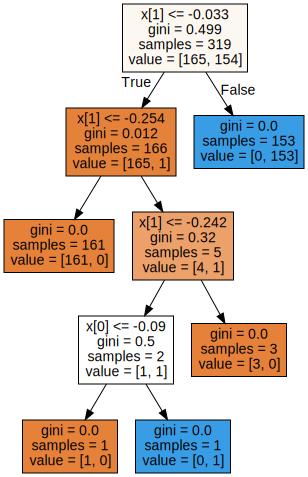

In [ ]:
dot_decision_tree = tree.export_graphviz(model1, out_file=None, filled=True)
decision_tree_plot = graphviz.Source(dot_decision_tree, format='png')
decision_tree_plot

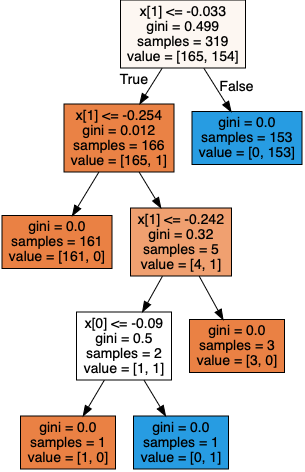

- data2:

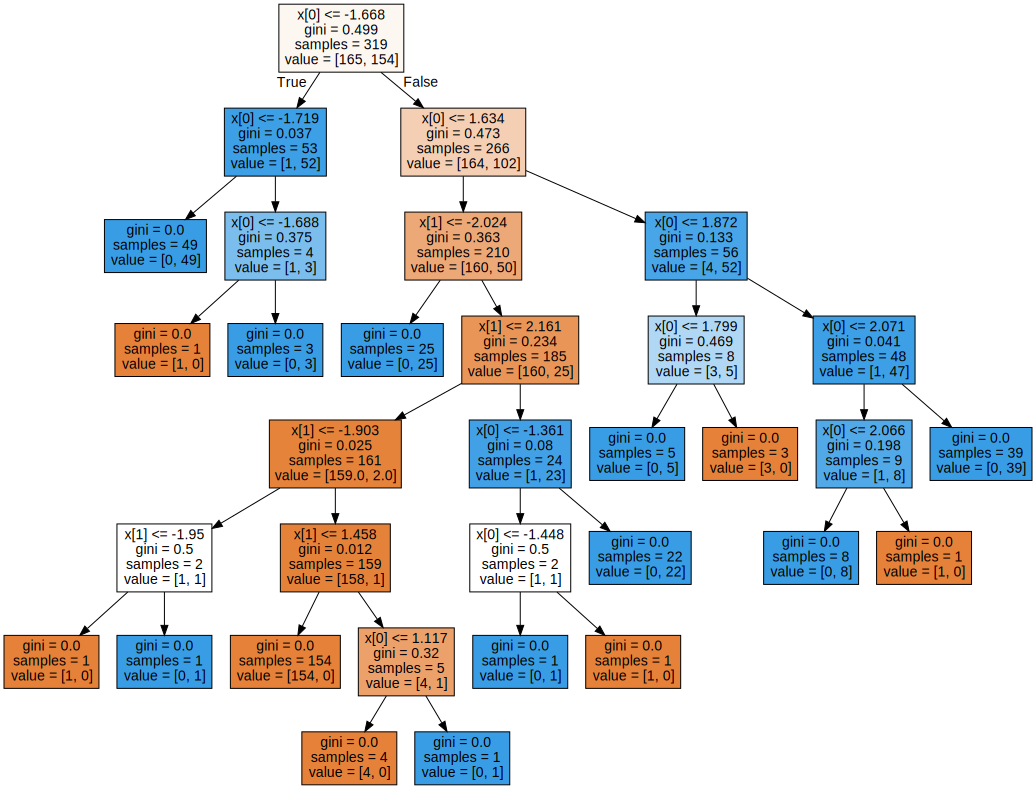

In [ ]:
dot_decision_tree = tree.export_graphviz(model2, out_file=None, filled=True)
decision_tree_plot = graphviz.Source(dot_decision_tree, format='png')
decision_tree_plot

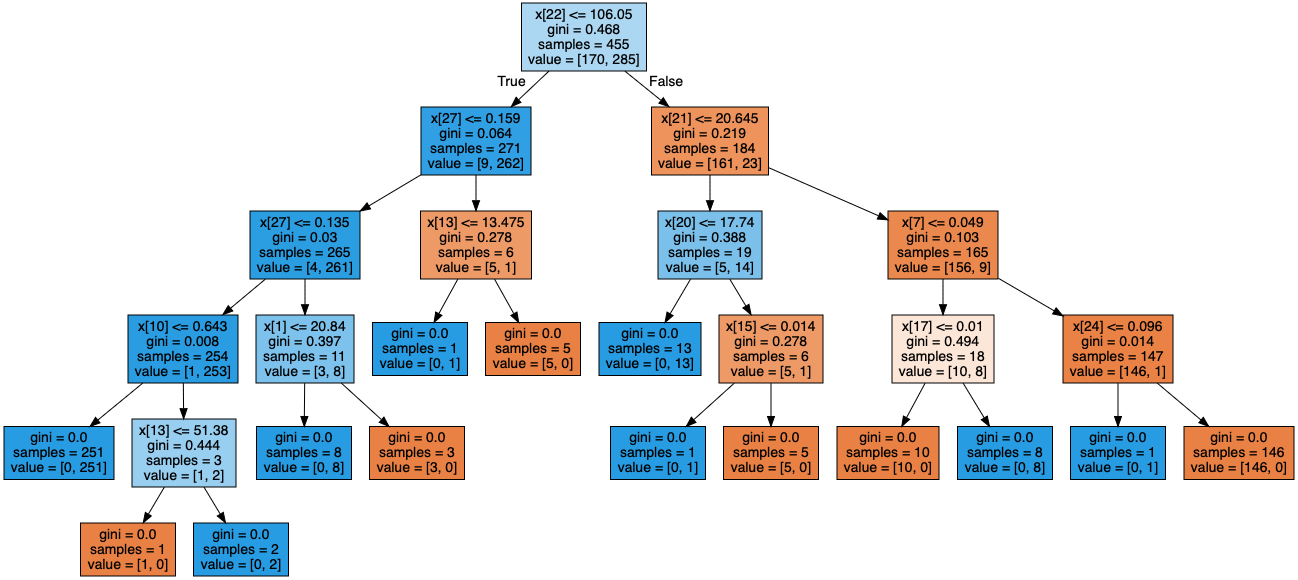

# 2. Lasy losowe



Skoro drzewa decyzyjne zostały już przetestowane, można przejść do bardziej złożonego algorytmu - lasów losowych, zbudowanych z wielu klasyfikatorów (w moim przypadku z drzew decyzyjnych).

W tym celu tworzę dwa modele reprezentujące lasy losowe, które następnie trenuję. Na koniec sprawdzam i wypisuję otrzymane wartości accuracy dla każdego ze zbiorów danych.

Wizualizacja działania całego lasu losowego może być problematyczna, ponieważ w moim przypadku las składał się domyślnie ze 100 drzew decyzyjnych. Aby zilustrować zasadę działania algorytmu, wybrałam do prezentacji 10 losowych drzew z tego lasu, co pozwala zaobserwować ich różnorodność i sposób podejmowania decyzji.

---- SET1 ----
dokladność na zbiorze testowym:
1.0
dokladność na zbiorze uczacym:
1.0
---- SET2 ----
dokladność na zbiorze testowym:
0.95
dokladność na zbiorze uczacym:
1.0


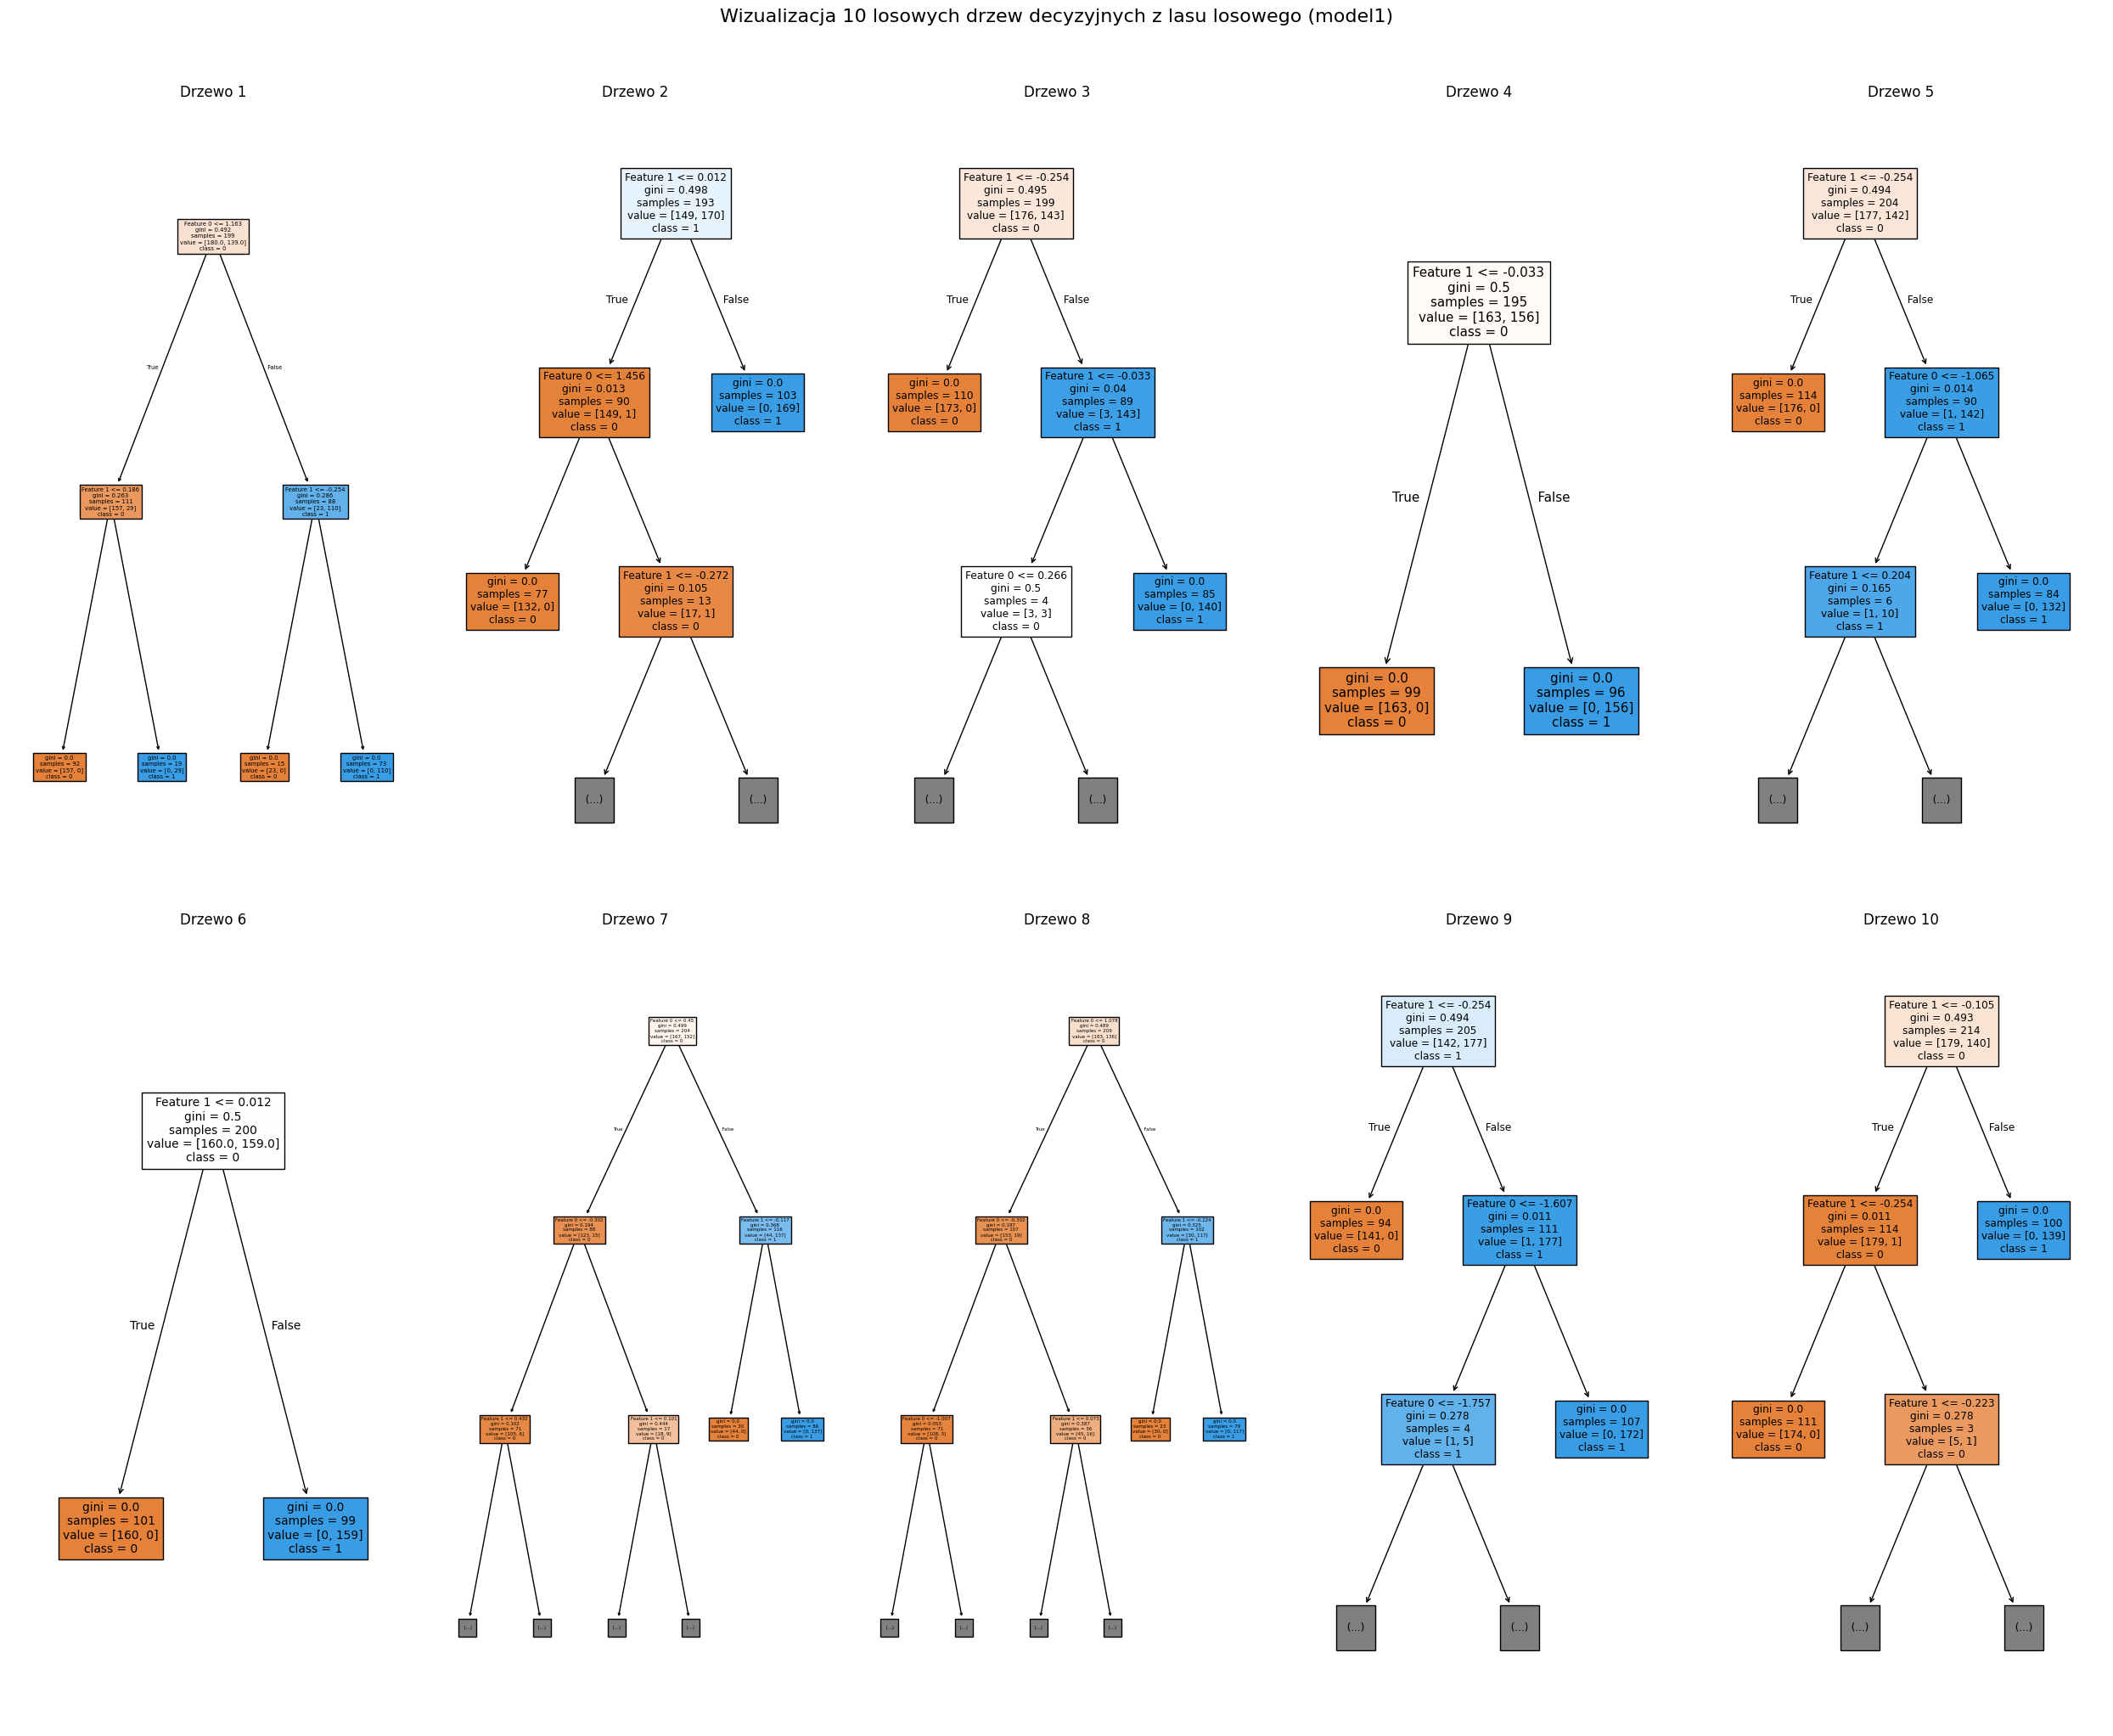

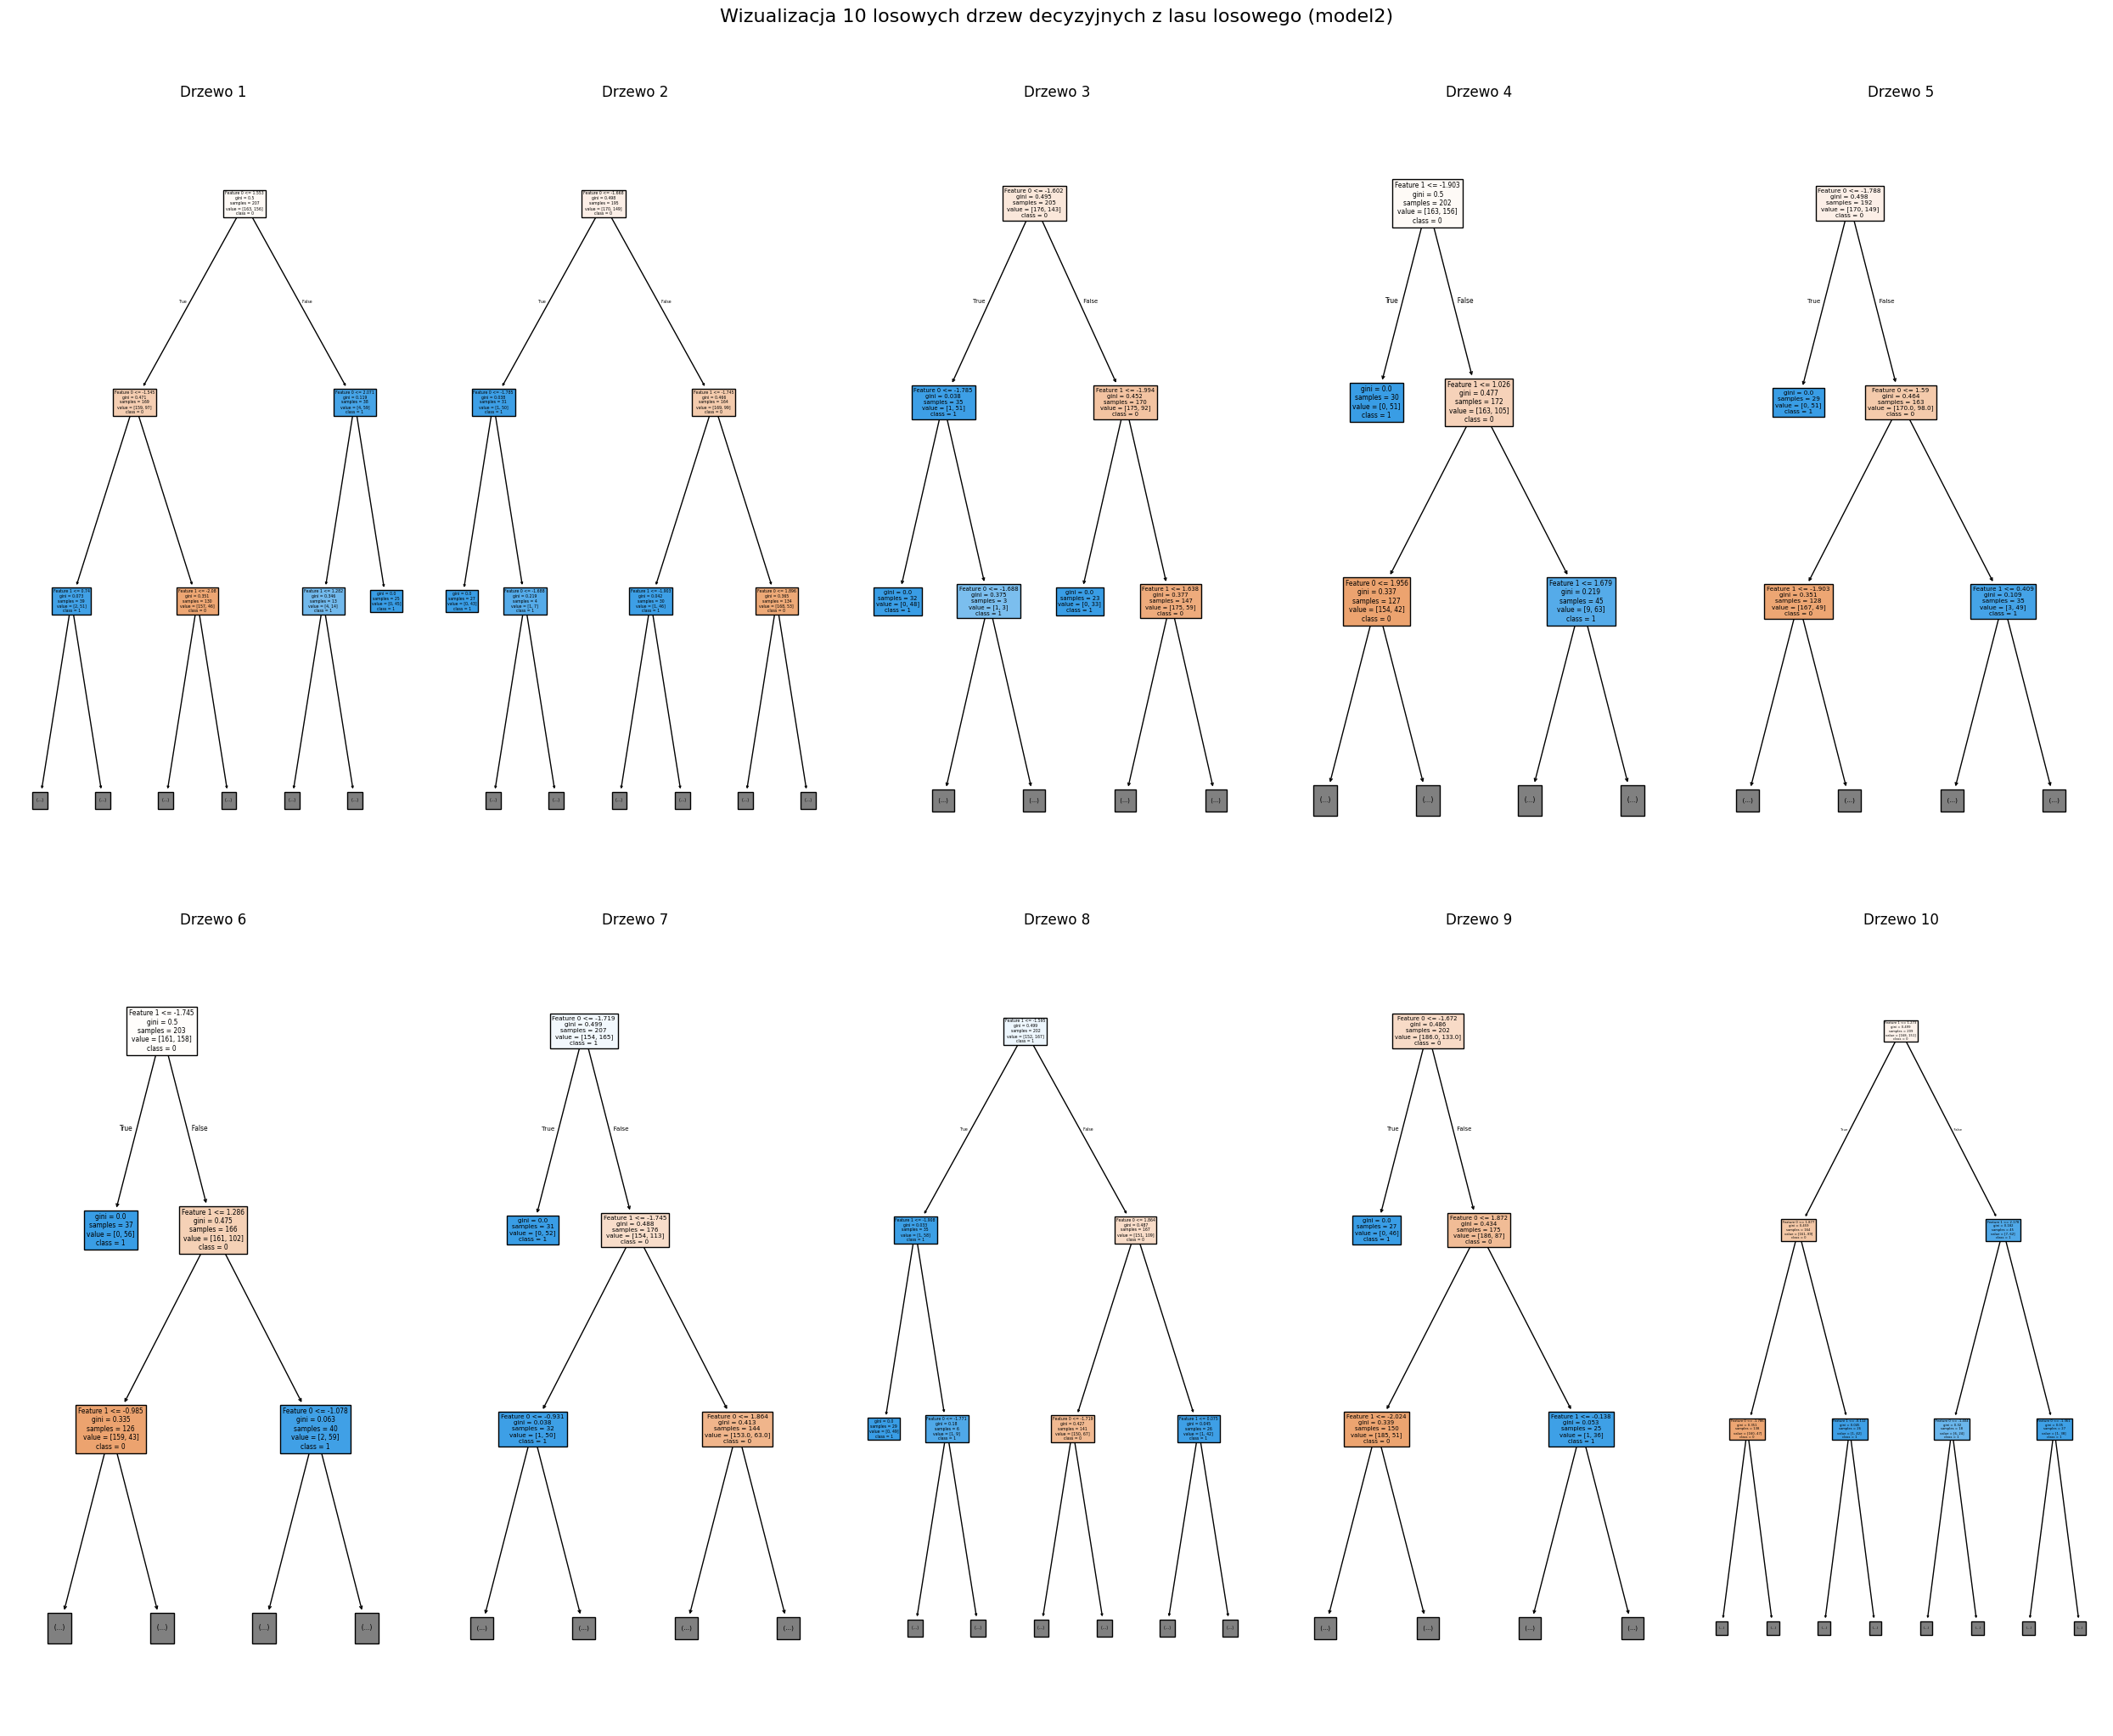

In [ ]:
model1 = RandomForestClassifier()
model2 = RandomForestClassifier()

model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)

print("---- SET1 ----")
print("dokladność na zbiorze testowym:")
print(accuracy_score(y_test1, model1.predict(X_test1)))
print("dokladność na zbiorze uczacym:")
print(accuracy_score(y_train1, model1.predict(X_train1)))

print("---- SET2 ----")
print("dokladność na zbiorze testowym:")
print(accuracy_score(y_test2, model2.predict(X_test2)))
print("dokladność na zbiorze uczacym:")
print(accuracy_score(y_train2, model2.predict(X_train2)))

# Wizualizacja 10 drzew z model1 na jednym wykresie
plt.figure(figsize=(25, 20))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plot_tree(model1.estimators_[i],
              filled=True,
              feature_names=[f"Feature {j}" for j in range(X_train1.shape[1])],
              class_names=[str(c) for c in set(y_train1)],
              max_depth=2)  # Ograniczenie głębokości
    plt.title(f"Drzewo {i+1}")
plt.suptitle("Wizualizacja 10 losowych drzew decyzyjnych z lasu losowego (model1)",
             fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

# Wizualizacja 10 drzew z model2 na jednym wykresie
plt.figure(figsize=(25, 20))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plot_tree(model2.estimators_[i],
              filled=True,
              feature_names=[f"Feature {j}" for j in range(X_train2.shape[1])],
              class_names=[str(c) for c in set(y_train1)],
              max_depth=2)  # Ograniczenie głębokości
    plt.title(f"Drzewo {i+1}")
plt.suptitle("Wizualizacja 10 losowych drzew decyzyjnych z lasu losowego (model2)",
             fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

# 3. SVM (Support Vector Machine, maszyna wektorów nośnych)

Kolejnym testowanym algorytmem była maszyna wektorów nośnych (SVM). Głównym celem tego algorytmu jest znalezienie optymalnej hiperpłaszczyzny dzielącej dane należące do różnych klas przy jednoczesnym maksymalizowaniu marginesu separacji. Margines definiuje się jako odległość hiperpłaszczyzny od najbliższych punktów treningowych, nazywanych wektorami nośnymi (support vectors). To właśnie te punkty mają kluczowe znaczenie dla wyznaczenia granicy decyzyjnej.

W celu poprawy wyników przeprowadziłam standaryzację danych. Następnie podzieliłam zestandaryzowane zbiory na dane uczące i testujące. Jak w przypadku poprzednich algorytmów, na koniec obliczyłam i porównałam dokładność (accuracy) klasyfikacji dla obu zbiorów danych.

In [ ]:
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(x1)
X_scaled2 = scaler.fit_transform(x2)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled1, y1, test_size=0.2, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y2, test_size=0.2, random_state=1)

model1 = SVC()
model2 = SVC()

model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)

print("---- SET1 ----")
print("dokladność na zbiorze testowym:")
print(accuracy_score(y_test1, model1.predict(X_test1)))
print("dokladność na zbiorze uczacym:")
print(accuracy_score(y_train1, model1.predict(X_train1)))

print("---- SET2 ----")
print("dokladność na zbiorze testowym:")
print(accuracy_score(y_test2, model2.predict(X_test2)))
print("dokladność na zbiorze uczacym:")
print(accuracy_score(y_train2, model2.predict(X_train2)))

---- SET1 ----
dokladność na zbiorze testowym:
1.0
dokladność na zbiorze uczacym:
0.9968652037617555
---- SET2 ----
dokladność na zbiorze testowym:
0.975
dokladność na zbiorze uczacym:
0.9905956112852664


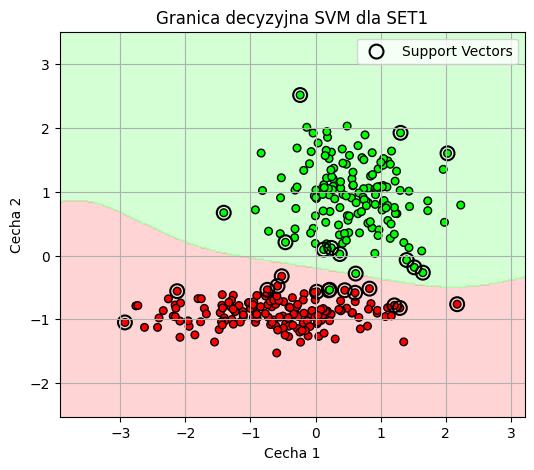

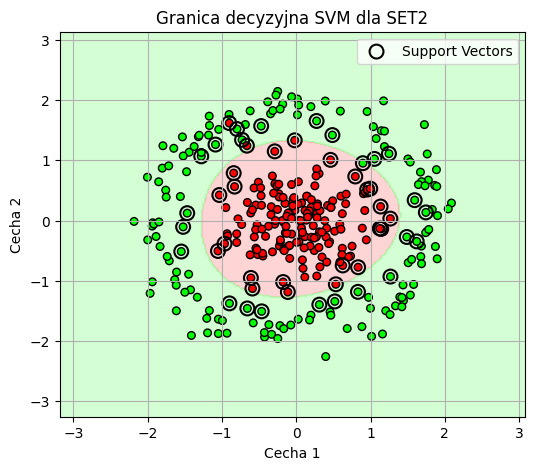

In [ ]:
def plot_svm_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA"])
    cmap_bold = ListedColormap(["#FF0000", "#00FF00"])

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k', s=30)

    if hasattr(model, "support_vectors_"):
        plt.scatter(model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=100, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

    plt.title(title)
    plt.xlabel('Cecha 1')
    plt.ylabel('Cecha 2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_svm_decision_boundary(X_train1, y_train1, model1, "Granica decyzyjna SVM dla SET1")
plot_svm_decision_boundary(X_train2, y_train2, model2, "Granica decyzyjna SVM dla SET2")

# 4. KNN (k-Nearest Neighbours)

Ostatnim testowanym algorytmem był klasyfikator k-najbliższych sąsiadów (k-NN). Zasada działania tego algorytmu polega na klasyfikowaniu nowych punktów danych poprzez analizę ich k najbliższych sąsiadów w przestrzeni cech - punkt zostaje przypisany do klasy dominującej wśród tych sąsiadów. Parametr k oznacza liczbę branych pod uwagę sąsiadów.

Wybór wartości parametru k ma istotny wpływ na zachowanie modelu:
- Małe wartości k (np. k=1) powodują wysoką czułość modelu na szumy i wartości odstające
- Duże wartości k prowadzą do rozmycia granic decyzyjnych i mogą powodować ich zniekształcenie

W mojej implementacji zastosowałam domyślną wartość parametru k=5.

In [ ]:
model1 = KNeighborsClassifier()
model2 = KNeighborsClassifier()

model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)

print("---- SET1 ----")
print("dokladność na zbiorze testowym:")
print(accuracy_score(y_test1, model1.predict(X_test1)))
print("dokladność na zbiorze uczacym:")
print(accuracy_score(y_train1, model1.predict(X_train1)))

print("---- SET2 ----")
print("dokladność na zbiorze testowym:")
print(accuracy_score(y_test2, model2.predict(X_test2)))
print("dokladność na zbiorze uczacym:")
print(accuracy_score(y_train2, model2.predict(X_train2)))

---- SET1 ----
dokladność na zbiorze testowym:
0.9875
dokladność na zbiorze uczacym:
0.9937304075235109
---- SET2 ----
dokladność na zbiorze testowym:
0.9875
dokladność na zbiorze uczacym:
0.987460815047022


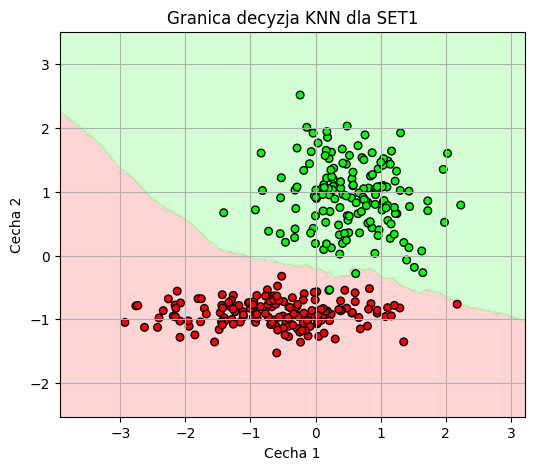

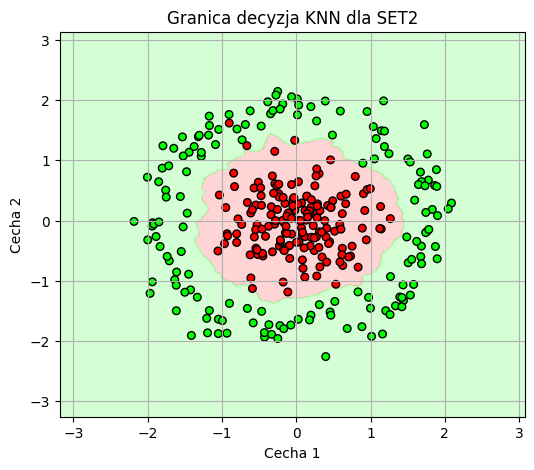

In [ ]:
def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.title(title)
    plt.xlabel('Cecha 1')
    plt.ylabel('Cecha 2')
    plt.grid(True)
    plt.show()


plot_decision_boundary(X_train1, y_train1, model1, 'Granica decyzja KNN dla SET1')
plot_decision_boundary(X_train2, y_train2, model2, 'Granica decyzja KNN dla SET2')

Dla zbioru data1 wszystkie testowane algorytmy osiągnęły doskonałe wyniki, przy czym zarówno lasy losowe, jak i SVM uzyskały idealną dokładność 1.0 na zbiorze testowym, podczas gdy drzewo decyzyjne i KNN nieznacznie od nich odstawały. W przypadku zbioru data2 wyraźnie widać przewagę lasów losowych, które osiągnęły najwyższą dokładność 0.95 na zbiorze testowym, minimalnie lepszą od SVM (0.975) i znacznie lepszą od pojedynczego drzewa (0.7875).

Najbardziej stabilnym algorytmem okazały się lasy losowe, które zachowały wysoką dokładność na obu zbiorach danych, nie wykazując przy tym oznak przeuczenia. SVM również wypadł bardzo dobrze, szczególnie na bardziej złożonym zbiorze data2, gdzie uzyskał drugi najlepszy wynik. Algorytm KNN, choć nie osiągnął najwyższych wartości, wykazał się dobrą równowagą między dokładnością a generalizacją.

Pojedyncze drzewo decyzyjne, mimo doskonałych wyników na prostszym zbiorze data1, wyraźnie przeuczyło się na bardziej złożonym zbiorze data2, gdzie różnica między dokładnością na zbiorze treningowym (0.909) a testowym (0.7875) była znacząca. Ten wynik potwierdza wadę pojedynczych drzew - tendencję do nadmiernego "overfitting'u".



---



Wybierając najlepszy algorytm, skłaniam się w stronę lasów losowych, które wykazały się najwyższą skutecznością i stabilnością spośród wszystkich testowanych modeli. Można je stosować zarówno do prostych, jak i złożonych danych. W przypadku lasów losowych mamy pewność, że drzewa będą zróżnicowane dzięki losowości, co zmniejsza ryzyko nadmiernego dopasowania. Dodatkowo proces uczenia jest skalowalny dzięki równoległemu trenowaniu poszczególnych drzew.

# Zadanie 2
W zadaniu drugim dla zbioru danych dotyczących raka piersi należało zaimplementować klasyfikatory wykorzystujące wszystkie omówione wcześniej algorytmy oraz sieć neuronową wielowarstwową


Dodatkowo należało wykonać wykresy zależności:
- dokładności klasyfikacji w zależności od liczby sąsiadów w algorytmie KNN
- dokładności klasyfikacji drzewa decyzyjnego w zależności od 3 dowolnych parametrów (max_depth, min_samples_split i min_samples_leaf)
- dokładności klasyfikacji lasu losowego w zależności od liczby drzew

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# print(data)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 1. Drzewo decyzyjne

dokładność na zbiorze testowym
0.9385964912280702
dokładność na zbiorze uczącym
1.0


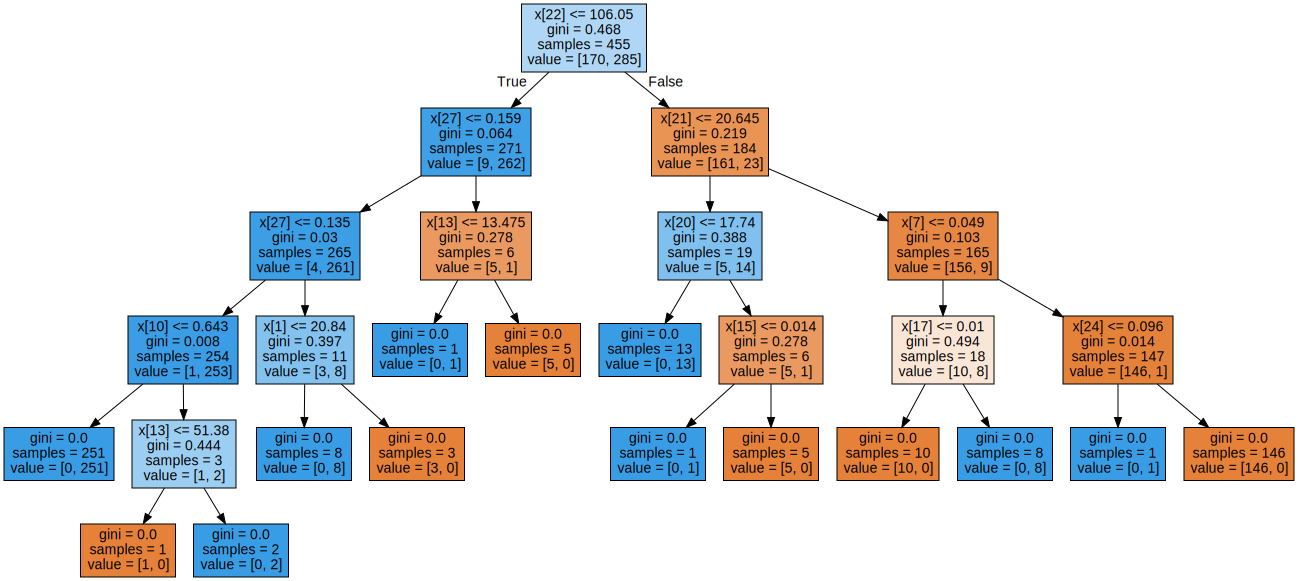

In [ ]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

print('dokładność na zbiorze testowym')
print(accuracy_score(y_test, model.predict(X_test)))
print('dokładność na zbiorze uczącym')
print(accuracy_score(y_train, model.predict(X_train)))
dot_decision_tree = tree.export_graphviz(model, out_file=None, filled=True)
decision_tree_plot = graphviz.Source(dot_decision_tree, format='png')
decision_tree_plot

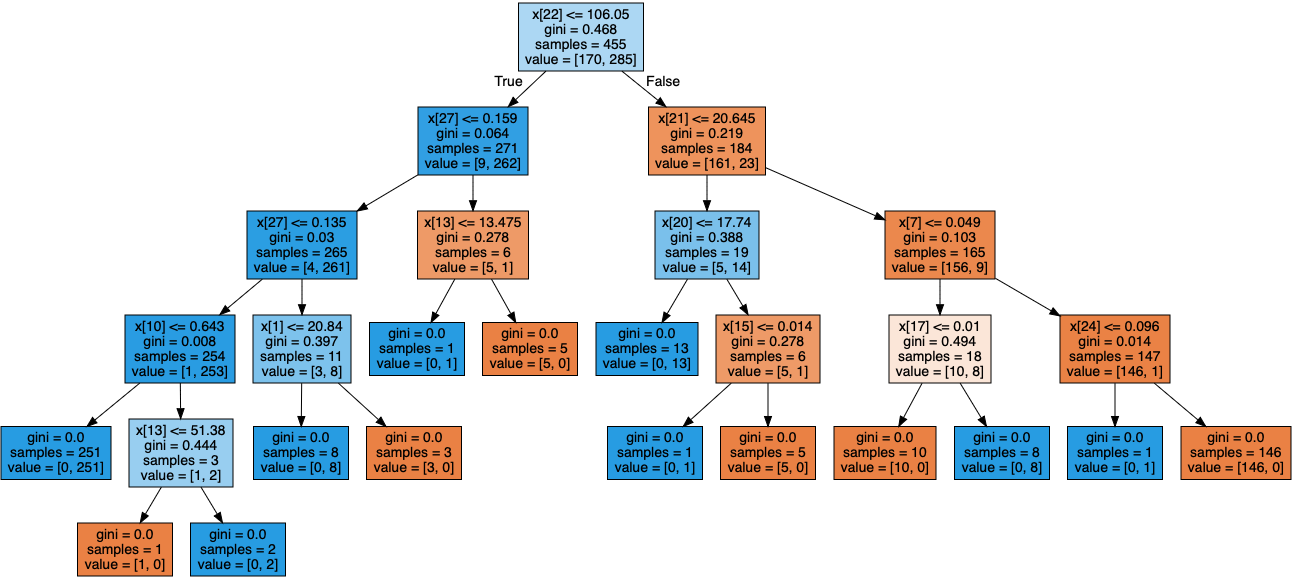

## dokładności klasyfikacji drzewa decyzyjnego w zależności od 3 dowolnych parametrów (max_depth, min_samples_split i min_samples_leaf)

Wyniki dla max_depth:
max_depth=1, dokładność=0.8998
max_depth=2, dokładność=0.9280
max_depth=3, dokładność=0.9174
max_depth=4, dokładność=0.9174
max_depth=5, dokładność=0.9227
max_depth=6, dokładność=0.9174
max_depth=7, dokładność=0.9156
max_depth=8, dokładność=0.9209
max_depth=9, dokładność=0.9174
max_depth=10, dokładność=0.9174
max_depth=11, dokładność=0.9174
max_depth=12, dokładność=0.9174
max_depth=13, dokładność=0.9174
max_depth=14, dokładność=0.9174
max_depth=15, dokładność=0.9174
max_depth=16, dokładność=0.9174
max_depth=17, dokładność=0.9174
max_depth=18, dokładność=0.9174
max_depth=19, dokładność=0.9174
max_depth=20, dokładność=0.9174


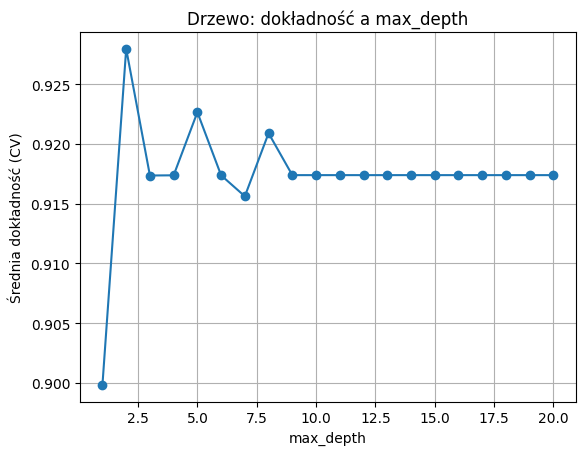


Wyniki dla min_samples_split:
min_samples_split=2, dokładność=0.9174
min_samples_split=3, dokładność=0.9209
min_samples_split=4, dokładność=0.9227
min_samples_split=5, dokładność=0.9191
min_samples_split=6, dokładność=0.9174
min_samples_split=7, dokładność=0.9174
min_samples_split=8, dokładność=0.9174
min_samples_split=9, dokładność=0.9139
min_samples_split=10, dokładność=0.9121
min_samples_split=11, dokładność=0.9121
min_samples_split=12, dokładność=0.9104
min_samples_split=13, dokładność=0.9104
min_samples_split=14, dokładność=0.9104
min_samples_split=15, dokładność=0.9104
min_samples_split=16, dokładność=0.9104
min_samples_split=17, dokładność=0.9121
min_samples_split=18, dokładność=0.9103
min_samples_split=19, dokładność=0.9156
min_samples_split=20, dokładność=0.9156


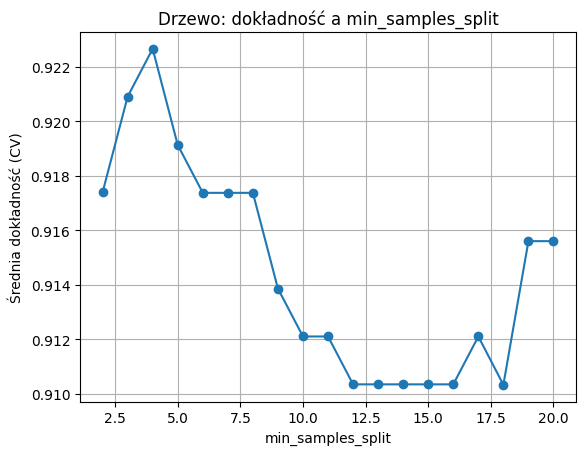


Wyniki dla min_samples_leaf:
min_samples_leaf=1, dokładność=0.9174
min_samples_leaf=2, dokładność=0.9156
min_samples_leaf=3, dokładność=0.9103
min_samples_leaf=4, dokładność=0.9050
min_samples_leaf=5, dokładność=0.9315
min_samples_leaf=6, dokładność=0.9349
min_samples_leaf=7, dokładność=0.9349
min_samples_leaf=8, dokładność=0.9385
min_samples_leaf=9, dokładność=0.9297
min_samples_leaf=10, dokładność=0.9297
min_samples_leaf=11, dokładność=0.9262
min_samples_leaf=12, dokładność=0.9227
min_samples_leaf=13, dokładność=0.9315
min_samples_leaf=14, dokładność=0.9297
min_samples_leaf=15, dokładność=0.9297
min_samples_leaf=16, dokładność=0.9315
min_samples_leaf=17, dokładność=0.9315
min_samples_leaf=18, dokładność=0.9315
min_samples_leaf=19, dokładność=0.9262
min_samples_leaf=20, dokładność=0.9262


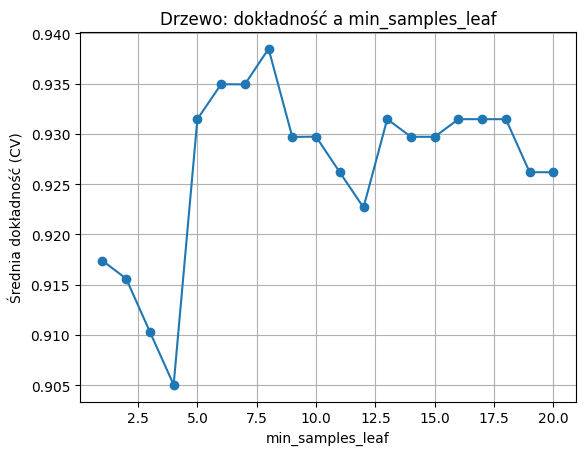

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Drzewa decyzyjne
# max_depth
depths = range(1, 21)
scores = []

print("Wyniki dla max_depth:")
for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=1)
    score = cross_val_score(model, X, y, cv=5).mean()
    scores.append(score)
    print(f"max_depth={d}, dokładność={score:.4f}")

plt.plot(depths, scores, marker='o')
plt.title('Drzewo: dokładność a max_depth')
plt.xlabel('max_depth')
plt.ylabel('Średnia dokładność (CV)')
plt.grid()
plt.show()

# min_samples_split
splits = range(2, 21)
scores = []

print("\nWyniki dla min_samples_split:")
for s in splits:
    model = DecisionTreeClassifier(min_samples_split=s, random_state=1)
    score = cross_val_score(model, X, y, cv=5).mean()
    scores.append(score)
    print(f"min_samples_split={s}, dokładność={score:.4f}")

plt.plot(splits, scores, marker='o')
plt.title('Drzewo: dokładność a min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Średnia dokładność (CV)')
plt.grid()
plt.show()

# min_samples_leaf
leaves = range(1, 21)
scores = []

print("\nWyniki dla min_samples_leaf:")
for l in leaves:
    model = DecisionTreeClassifier(min_samples_leaf=l, random_state=1)
    score = cross_val_score(model, X, y, cv=5).mean()
    scores.append(score)
    print(f"min_samples_leaf={l}, dokładność={score:.4f}")

plt.plot(leaves, scores, marker='o')
plt.title('Drzewo: dokładność a min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Średnia dokładność (CV)')
plt.grid()
plt.show()


# 2. Lasy losowe

In [ ]:
# Lasy Losowe
model = RandomForestClassifier()

model.fit(X_train, y_train)

print('dokładność na zbiorze testowym')
print(accuracy_score(y_test, model.predict(X_test)))
print('dokładność na zbiorze uczącym')
print(accuracy_score(y_train, model.predict(X_train)))


dokładność na zbiorze testowym
0.9649122807017544
dokładność na zbiorze uczącym
1.0


## dokładności klasyfikacji lasu losowego w zależności od liczby drzew

Wyniki dla n_estimators:
n_estimators=1, dokładność testowa=0.9123
n_estimators=6, dokładność testowa=0.9561
n_estimators=11, dokładność testowa=0.9561
n_estimators=16, dokładność testowa=0.9474
n_estimators=21, dokładność testowa=0.9474
n_estimators=26, dokładność testowa=0.9561
n_estimators=31, dokładność testowa=0.9561
n_estimators=36, dokładność testowa=0.9386
n_estimators=41, dokładność testowa=0.9474
n_estimators=46, dokładność testowa=0.9561
n_estimators=51, dokładność testowa=0.9561
n_estimators=56, dokładność testowa=0.9561
n_estimators=61, dokładność testowa=0.9561
n_estimators=66, dokładność testowa=0.9561
n_estimators=71, dokładność testowa=0.9561
n_estimators=76, dokładność testowa=0.9561
n_estimators=81, dokładność testowa=0.9561
n_estimators=86, dokładność testowa=0.9561
n_estimators=91, dokładność testowa=0.9561
n_estimators=96, dokładność testowa=0.9561


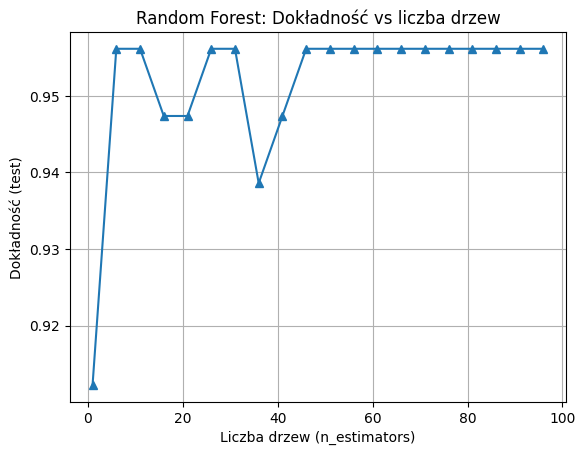

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

trees_range = range(1, 101, 5)
test_scores = []

print("Wyniki dla n_estimators:")
for n in trees_range:
    model = RandomForestClassifier(n_estimators=n, random_state=1)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    test_scores.append(accuracy)
    print(f"n_estimators={n}, dokładność testowa={accuracy:.4f}")

plt.plot(trees_range, test_scores, marker='^')
plt.xlabel('Liczba drzew (n_estimators)')
plt.ylabel('Dokładność (test)')
plt.title('Random Forest: Dokładność vs liczba drzew')
plt.grid()
plt.show()


# 3. SVM

In [ ]:
# SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

model = SVC()

model.fit(X_train, y_train)

print('dokładność na zbiorze testowym')
print(accuracy_score(y_test, model.predict(X_test)))
print('dokładność na zbiorze uczącym')
print(accuracy_score(y_train, model.predict(X_train)))

dokładność na zbiorze testowym
0.9736842105263158
dokładność na zbiorze uczącym
0.9868131868131869


# 4. KNN

In [ ]:
# KNN
model = KNeighborsClassifier()

model.fit(X_train, y_train)

print('dokładność na zbiorze testowym')
print(accuracy_score(y_test, model.predict(X_test)))
print('dokładność na zbiorze uczącym')
print(accuracy_score(y_train, model.predict(X_train)))

dokładność na zbiorze testowym
0.9385964912280702
dokładność na zbiorze uczącym
0.9472527472527472


## dokładności klasyfikacji w zależności od liczby sąsiadów w algorytmie KNN

Wyniki dla różnych wartości k (liczba sąsiadów):
k=1, dokładność treningowa=1.0000, dokładność testowa=0.9211
k=2, dokładność treningowa=0.9538, dokładność testowa=0.9211
k=3, dokładność treningowa=0.9516, dokładność testowa=0.9211
k=4, dokładność treningowa=0.9451, dokładność testowa=0.9035
k=5, dokładność treningowa=0.9473, dokładność testowa=0.9386
k=6, dokładność treningowa=0.9363, dokładność testowa=0.9474
k=7, dokładność treningowa=0.9275, dokładność testowa=0.9386
k=8, dokładność treningowa=0.9341, dokładność testowa=0.9474
k=9, dokładność treningowa=0.9297, dokładność testowa=0.9298
k=10, dokładność treningowa=0.9363, dokładność testowa=0.9298
k=11, dokładność treningowa=0.9363, dokładność testowa=0.9298
k=12, dokładność treningowa=0.9341, dokładność testowa=0.9298
k=13, dokładność treningowa=0.9319, dokładność testowa=0.9211
k=14, dokładność treningowa=0.9341, dokładność testowa=0.9211
k=15, dokładność treningowa=0.9363, dokładność testowa=0.9211
k=16, dokładność treningowa=0.

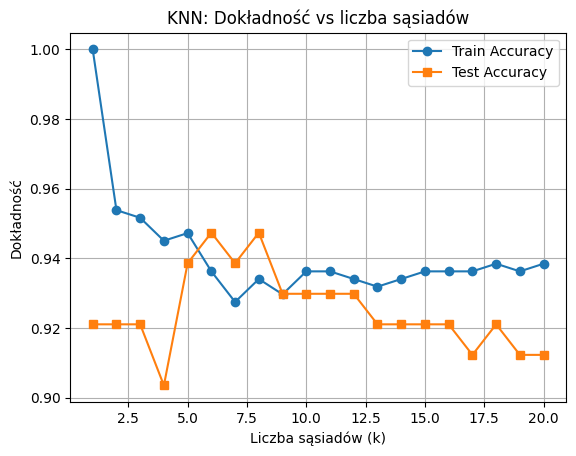

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_range = range(1, 21)
train_scores = []
test_scores = []

print("Wyniki dla różnych wartości k (liczba sąsiadów):")
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    print(f"k={k}, dokładność treningowa={train_acc:.4f}, dokładność testowa={test_acc:.4f}")

plt.plot(k_range, train_scores, label='Train Accuracy', marker='o')
plt.plot(k_range, test_scores, label='Test Accuracy', marker='s')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Dokładność')
plt.title('KNN: Dokładność vs liczba sąsiadów')
plt.legend()
plt.grid()
plt.show()



1. Drzewa decyzyjne:
  - Dla parametru max_depth dokładność szybko rośnie od max_depth=1 do max_depth=2, a następnie stabilizuje się na poziomie ~0.9174. Przy niewielkiej głębokości model osiąga wysoką skuteczność. Dalsze zwiększanie złożoności nie poprawia jakości predykcji, co może wskazywać na zjawisko przeuczenia – choć nie objawia się ono spadkiem dokładności, to brak dalszej poprawy sugeruje, że model uczy się szczegółów nieistotnych.
  - Dla parametru min_samples_split najlepsze wyniki (dokładność do ~0.9227) uzyskujemy dla wartości w przedziale 3–5. Dalsze zwiększanie tej wartości prowadzi do spadku dokładności, ponieważ model tworzy mniej rozgałęzień, co może skutkować niedouczeniem (underfitting).

  - Dla parametru min_samples_leaf wzrost wartości tego parametru do około 8 powoduje stopniową poprawę dokładności testowej, osiągając maksimum przy min_samples_leaf=8 (0.9385), a następnie wartości stabilizują się lub lekko spadają. Wymuszając większą liczbę próbek w liściach, redukujemy złożoność drzewa, co pomaga uniknąć przeuczenia i poprawia generalizację modelu.


2. Lasy losowe:
  - Zwiększanie liczby drzew w lesie losowym poprawia dokładność testową do momentu osiągnięcia około 20–30 estymatorów, po czym wyniki stabilizują się na poziomie ~0.9561. Model dobrze radzi sobie z unikaniem przeuczenia i osiąga wysoką dokładność przy umiarkowanej złożoności.

3. K najbliższych sąsiadów (KNN):
  - Przy k=1 model osiąga perfekcyjną dokładność na zbiorze treningowym (1.000), ale niską na testowym (0.9211), co sugieruje, że model "zapamiętuje" dane treningowe.
  - Wraz ze wzrostem k, dokładność treningowa stopniowo spada, natomiast testowa początkowo rośnie, osiągając maksimum (0.9474) przy k=6 i k=8, co wskazuje na lepszą generalizację modelu.
  - Dalsze zwiększanie wartości k prowadzi do spadku dokładności testowej – model staje się zbyt uogólniony i zaczyna niedouczać.
  Optymalne wartości k stanowią kompromis pomiędzy dokładnym dopasowaniem do danych treningowych a zdolnością do generalizacji na nowe dane.





Jeśli chodzi o wybór najlepszego algorytmu pod kątem wyników na naszym zbiorze, to drzewo decyzyjne i KNN mają identyczną dokładność na zbiorze testowym (0,9386), ale KNN wypada gorzej na zbiorze uczącym, co może świadczyć o niedouczeniu. Lasy losowe dają lepsze wyniki niż pojedyncze drzewo i są porównywalne do SVM.

SVM posiada małą różnicą między wynikami na zbiorze treningowym a testowym, osiąga bardzo dobre wyniki, a jedyną jego wadą – ze względu na złożoność zbioru danych – może być dłuższy czas obliczeń.

Random Forest, dzięki losowości, jest odporny na overfitting, jednak uzyskana dokładność na zbiorze treningowym równa 100% może budzić podejrzenia co do lekkiego przeuczenia, zwłaszcza że wynik na teście jest nieco gorszy.

Zatem skłaniam się k temu, że dla naszego zbioru danych bardziej odpowiedni będzie SVM – o ile nie mamy ograniczeń czasowych. W przypadku, gdyby takie ograniczenia występowały, lasy losowe również bardzo dobrze poradzą sobie z tym zadaniem.

# Zadanie 3

Do danych z zadania 2 należało zastosować jeszcze dodatkowo XGBoost oraz zapoznać się z charakterystyką tego algorytmu.


- Gradient -  pole wektorowe wskazujące kierunki najszybszych wzrostów wartości danego pola skalarnego w poszczególnych punktach, przy czym moduł („długość”) każdego wektora jest równy szybkości wzrostu pola skalarnego w kierunku największego wzrostu.
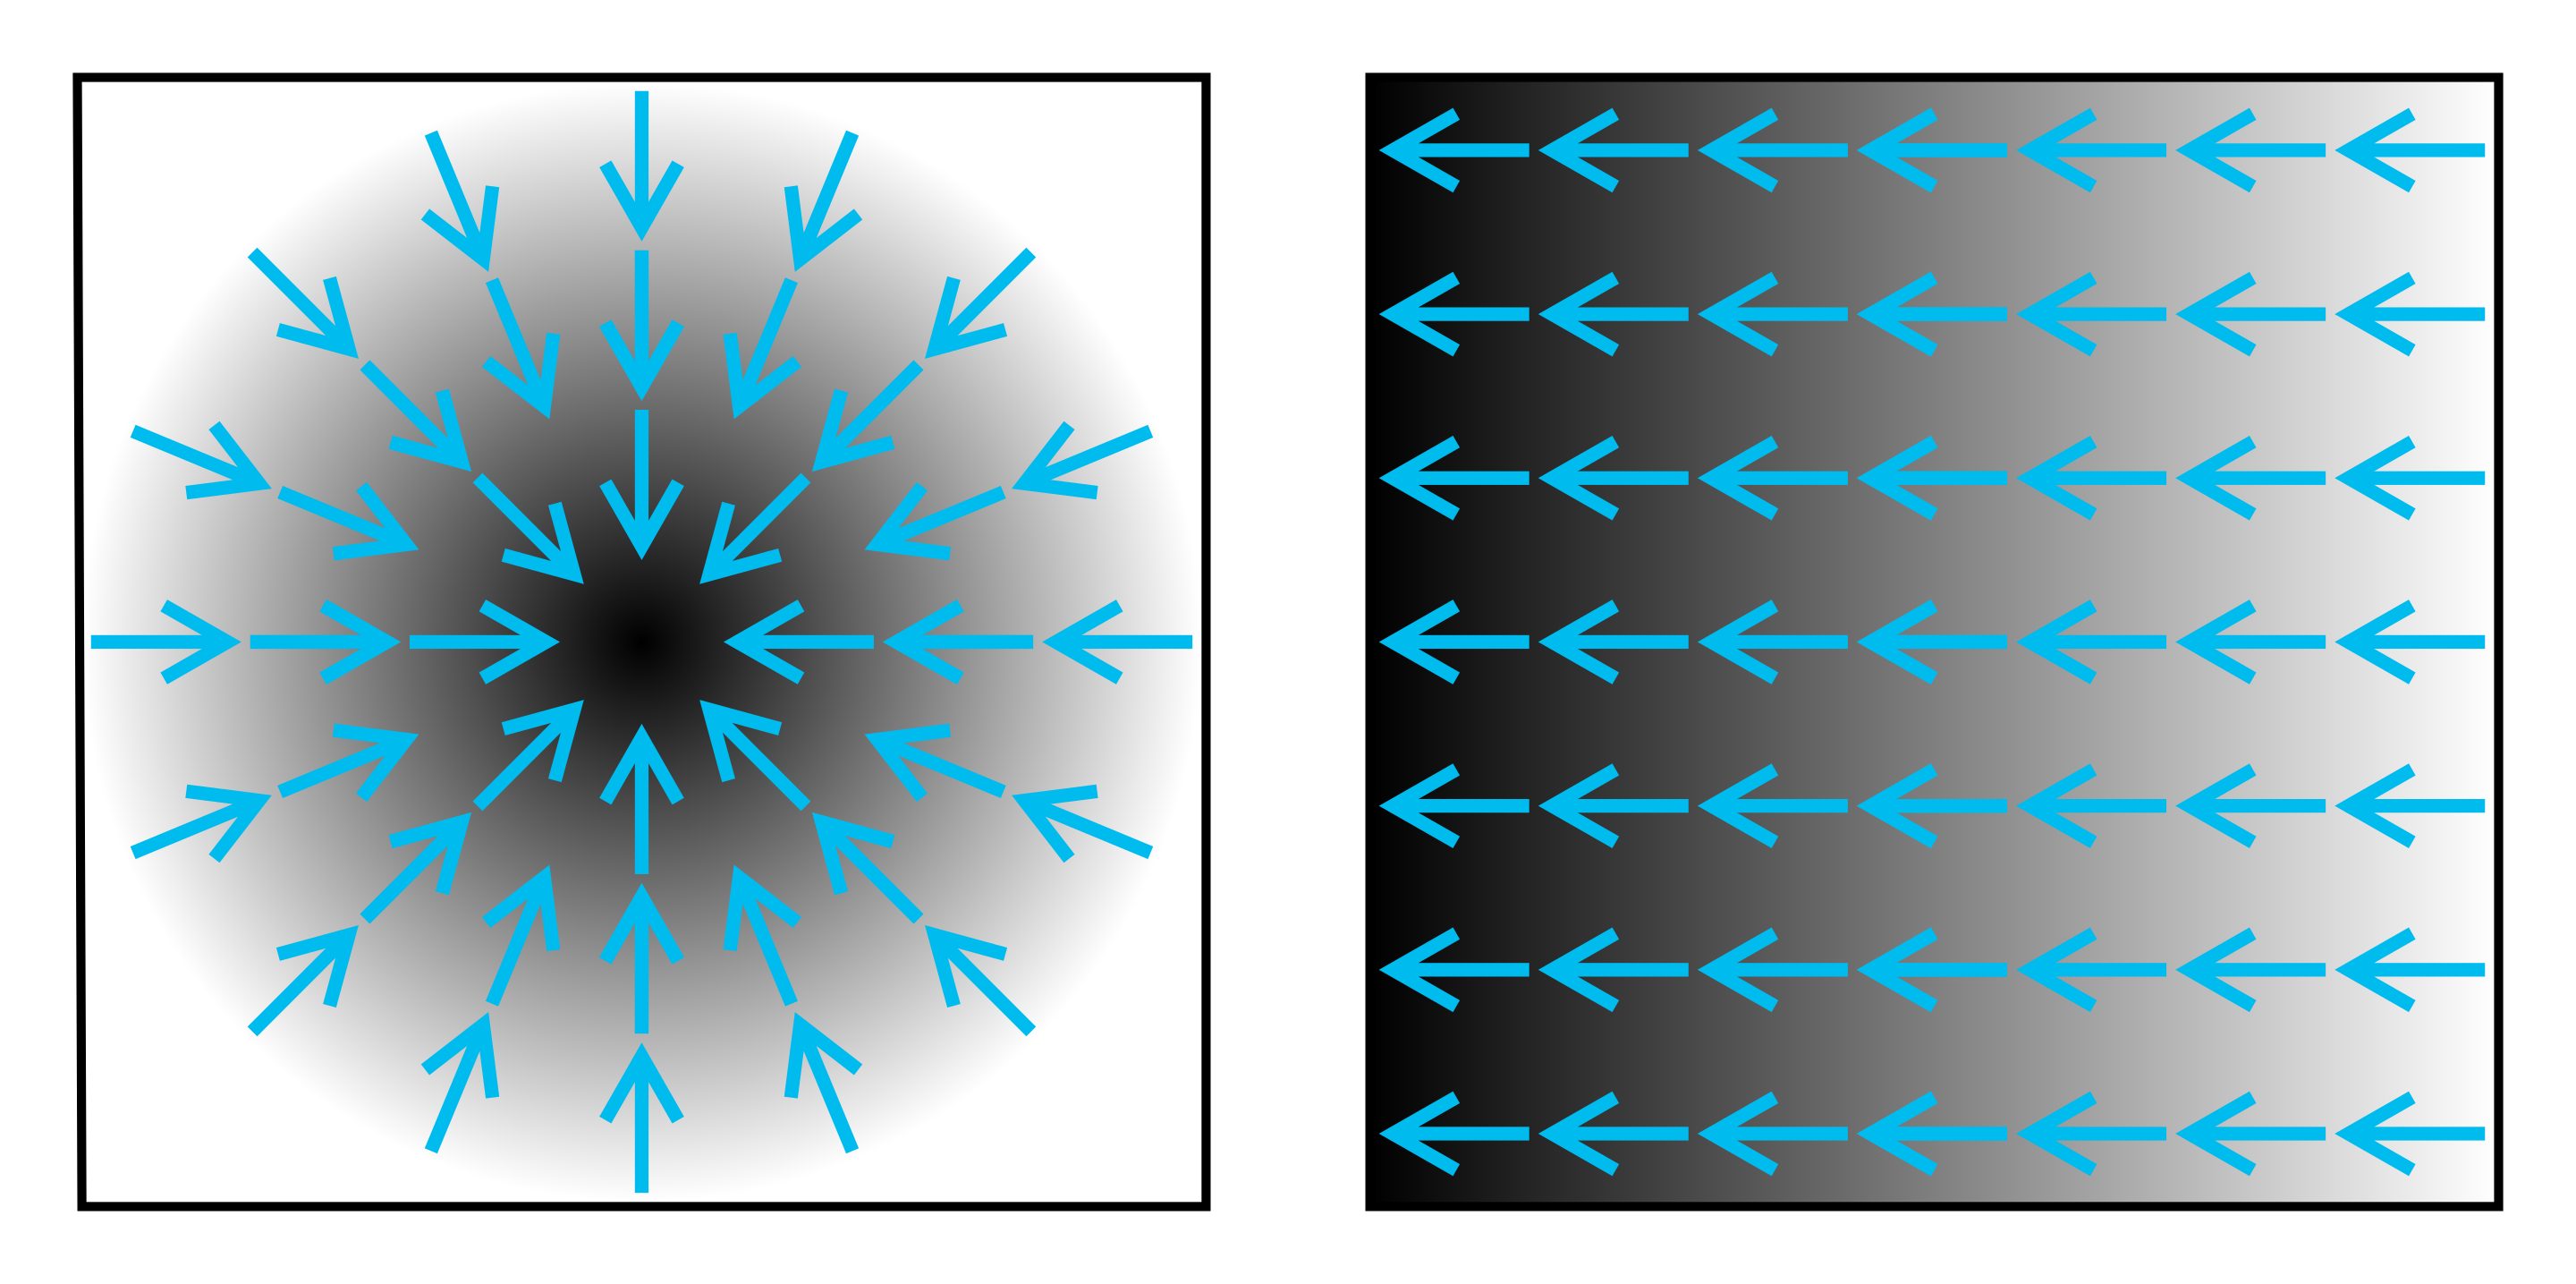

- Boosting - to tak zwane przyśpieszenie. Polega na tym, że w każdym kolejnym kroku chcemy poprawić wcześniejsze błędy.

W pierwszym kroku budujemy proste drzewo decyzyjne. Następnie, mając informacje o działaniu tego drzewa, budujemy kolejne drzewko, które próbuje naprawić błąd tego wcześniejszego. I tak dalej. Uruchamiamy kolejne iteracje działające w taki sam sposób, tzn. próbując naprawiać wszystkie wcześniejsze decyzje. A korzystając z gradientu wiemy, w którym kierunku należy to robić. To jest idea przyśpieszonego uczenia.

Bardziej matematycznie można byłoby to podsumować, że po każdym przebiegu próbujemy dopasować nasz predyktor do błędu resztkowego popełnionego przez poprzedni predyktor.





* Krok 1 - mamy zbiór uczący. Poniższe wartości (kropki) będziemy starali się przewidywać.

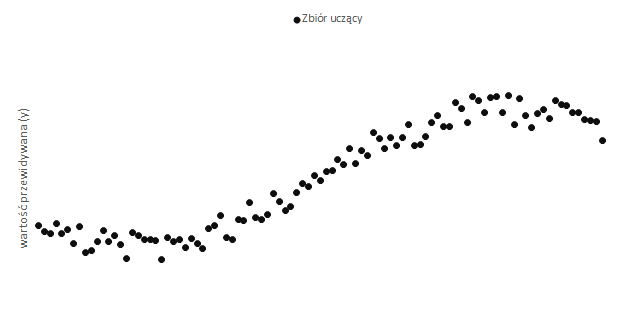

Krok 2 – budujemy pierwsze proste drzewo decyzyjne. Prognozę drzewa nanosimy na wykres zieloną kreską.

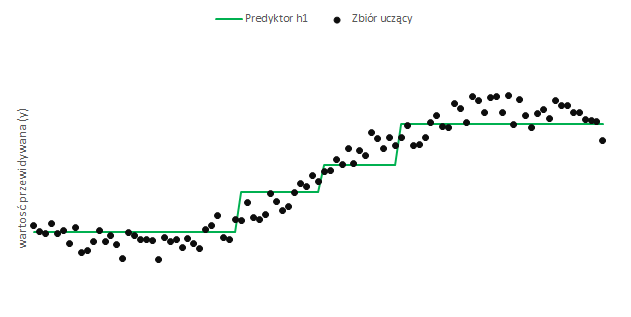

Krok 3 - naprawiamy błędy wcześniejszego drzewa, czyli wyliczamy reszty i dla nich budujemy kolejne drzewo. Reszty wyliczamy poprzez odjęcie od wartości rzeczywistej wartości przewidywanej.

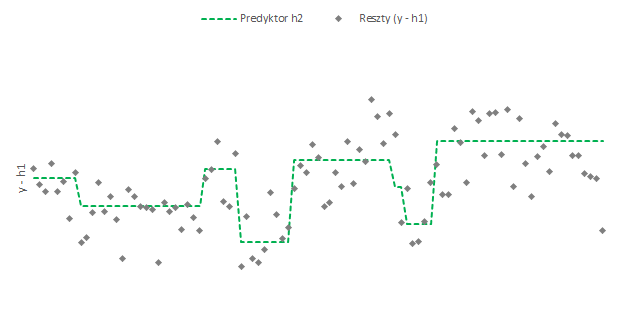

Robimy to, dopóki nie osiągniemy wartości zbliżonej do tej, którą chcemy prognozować. Postępy można monitorować, porównując predykcje, aby sprawdzić, jak dobrze dopasowują się one do konkretnego przykładu.

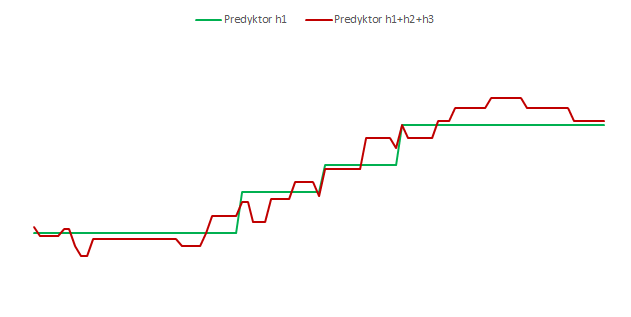


Jednym z rodzajów implementacji jest algorytm zaproponowany przez Tianqi Chena, nazwany XGBoost.

image.png

Podstawowe hiperparametry, z których korzystamy:

**Główne:**
  - learning_rate / eta [default=0.3] – parametr mówiący po każdej wyliczonej iteracji, jaki krok chcemy dać do przodu. Im większy krok, tym szybciej zbliżamy się do celu, ale jeśli będzie zbyt duży, to możemy nie dojść do najlepszego wyniku.
  - max_depth [default=6] – maksymalna głębokość prostych drzew. Im głębsze drzewa, tym model jest mocniejszy, ale trzeba uważać, aby nie przeuczyć modelu.
  - n_estimators – liczba prostych drzewek, które chcemy zbudować.
  - min_child_weight – mówi o minimalnej liczbie obserwacji w każdym liściu drzewa. Im większa waga, tym model bardziej konserwatywny – potrzebujemy większej wagi, aby dokonać danego podziału.
  - gamma [default=0] – odpowiada za zmniejszenie strat wymaganych do utworzenia kolejnego węzła liści. Im większa waga, tym model jest bardziej konserwatywny.
  - seed  [default=0] – nasionko, które służy do generowania liczb losowych.


**Do walki z przeuczeniem:**
  - subsample [default=1] – informacja, jaki procent obserwacji chcemy brać do budowy prostego drzewka
  - colsample_bytree [default=1] – informacja, jaki procent charakterystyk chcemy brać do budowy prostego drzewka
  - colsample_bylevel [default=1] -informacja, jaki procent charakterystyk chcemy losować do budowy prostego drzewka po każdym kolejnym podziale danych (split)
  - max_delta_step [default=0] – maksymalny krok delta pozwalający na wyjście z każdego liścia. Wartość 0 oznacza brak ograniczeń. Jeśli jest ustawiona na wartość dodatnią, może pomóc w uczynieniu kroku aktualizacji bardziej konserwatywnym. Zwykle ten parametr nie jest potrzebny, ale może pomóc w regresji logistycznej, gdy klasa jest wyjątkowo niezrównoważona. Ustawienie wartości 1-10 może pomóc w kontrolowaniu aktualizacji.


**Kolejne dwa to regularyzacje (również pomagają w walce z overfittingiem czyli przeuczeniem).**
  - alpha [default=0] – odpowiada za parametr alfa przy regularyzacji L1 (Lasso). Im większa waga, tym model jest bardziej konserwatywny.
  Można myśleć, że im większa alpha, tym mniej charakterystyk jest branych pod uwagę i wyłapywane są bardziej istotne. Stopniowo odrzuca współliniowe atrybuty i pozostawia zbiór najbardziej istotnych.

  - lambda [default=1] – odpowiada za parametr lambda przy regularyzacji L2 (Ridge regression).  Im większa waga tym model jest bardziej konserwatywny.
  Intuicyjnie im większe lambda, tym wagi będą bliższe zeru.

Intuicyjnie im większe lambda, tym wagi będą bliższe zeru.

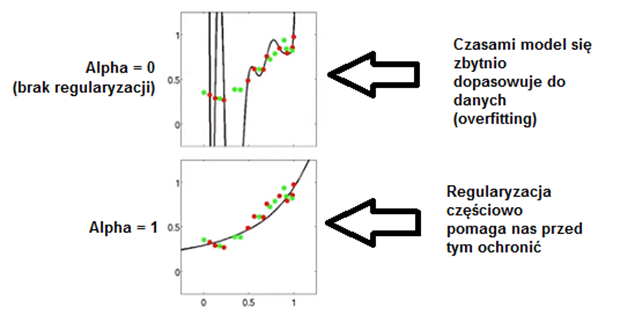

Dokładność na zbiorze testowym:
0.9649122807017544
Dokładność na zbiorze treningowym:
1.0


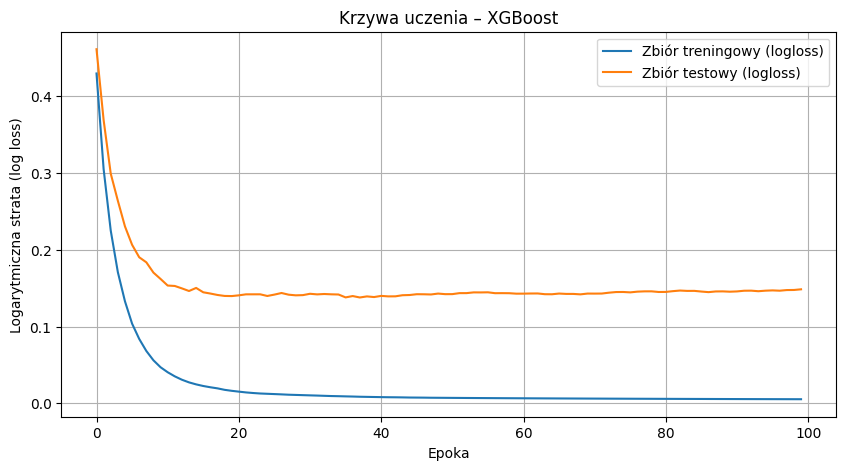

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Wczytanie danych – zbiór danych raka piersi
dane = load_breast_cancer()
X = dane.data
y = dane.target

# Podział danych na zbiór treningowy i testowy
X_tren, X_test, y_tren, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Inicjalizacja klasyfikatora XGBoost
model = xgb.XGBClassifier(eval_metric='logloss')

# Trening modelu z oceną na zbiorze treningowym i testowym
zbiory_oceny = [(X_tren, y_tren), (X_test, y_test)]
model.fit(X_tren, y_tren, eval_set=zbiory_oceny, verbose=False)

# Predykcje i dokładność
print('Dokładność na zbiorze testowym:')
print(accuracy_score(y_test, model.predict(X_test)))

print('Dokładność na zbiorze treningowym:')
print(accuracy_score(y_tren, model.predict(X_tren)))

# Historia uczenia – logloss
historia_uczenia = model.evals_result()

# Wykres logloss dla zbioru treningowego i testowego
plt.figure(figsize=(10, 5))
liczba_epok = len(historia_uczenia['validation_0']['logloss'])
os_x = range(liczba_epok)
plt.plot(os_x, historia_uczenia['validation_0']['logloss'], label='Zbiór treningowy (logloss)')
plt.plot(os_x, historia_uczenia['validation_1']['logloss'], label='Zbiór testowy (logloss)')
plt.xlabel('Epoka')
plt.ylabel('Logarytmiczna strata (log loss)')
plt.title('Krzywa uczenia – XGBoost')
plt.legend()
plt.grid(True)
plt.show()

Na krzywej uczenia widać, że dla danych treningowych krzywa spada blisko wartości zero, przez co accuracy na danych treningowych wynosi 1.0. Natomiast płaska linia na zbiorze testowym po około 20 epokach wskazuje, że dalsze trenowanie nie przynosi już znaczących korzyści.

Widać, że model lekko się przeuczył, co można wywnioskować z otrzymanych wyników.


Spróbowałam dodatkowo poprawić model, modyfikując kilka parametrów.

Po eksperymentowaniu z hiperparametrami udało się w końcu osiągnąć bardzo dobry wynik, jednocześnie unikając przeuczenia, jak pokazano poniżej:

Dokładność na zbiorze testowym:
0.9649122807017544
Dokładność na zbiorze treningowym:
0.9956043956043956


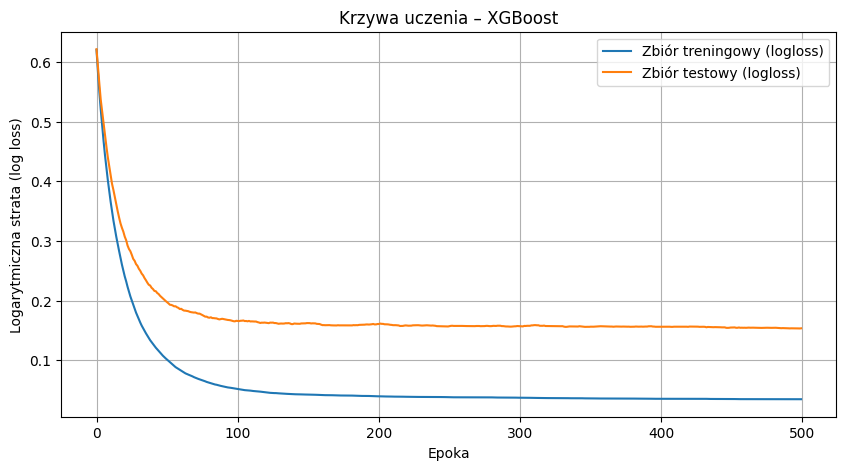

In [ ]:
model = xgb.XGBClassifier(
    eval_metric='logloss',
    learning_rate=0.05,       # mniejszy krok, wolniejsza ale stabilniejsza nauka
    max_depth=4,              # mniejsze drzewo - mniej overfittingu
    n_estimators=500,         # większa liczba drzew, bo mniejszy learning_rate
    min_child_weight=3,       # większa minimalna waga liścia (bardziej konserwatywny podział)
    gamma=1,                  # minimalna utrata wymagana, by rozbić węzeł - walka z przeuczeniem
    subsample=0.8,            # losowo wybieramy 80% próbek do budowy każdego drzewa
    colsample_bytree=0.8,     # losowo wybieramy 80% cech do budowy każdego drzewa
    reg_alpha=0.1,            # L1 regularization - delikatne usuwanie nieistotnych cech
    reg_lambda=1,             # L2 regularization
)

zbiory_oceny = [(X_tren, y_tren), (X_test, y_test)]
model.fit(X_tren, y_tren, eval_set=zbiory_oceny, verbose=False)

print('Dokładność na zbiorze testowym:')
print(accuracy_score(y_test, model.predict(X_test)))

print('Dokładność na zbiorze treningowym:')
print(accuracy_score(y_tren, model.predict(X_tren)))

historia_uczenia = model.evals_result()

plt.figure(figsize=(10, 5))
liczba_epok = len(historia_uczenia['validation_0']['logloss'])
os_x = range(liczba_epok)
plt.plot(os_x, historia_uczenia['validation_0']['logloss'], label='Zbiór treningowy (logloss)')
plt.plot(os_x, historia_uczenia['validation_1']['logloss'], label='Zbiór testowy (logloss)')
plt.xlabel('Epoka')
plt.ylabel('Logarytmiczna strata (log loss)')
plt.title('Krzywa uczenia – XGBoost')
plt.legend()
plt.grid(True)
plt.show()


# Biblliografia
1. https://www.researchgate.net/publication/371202498_Exploring_the_Power_of_eXtreme_Gradient_Boosting_Algorithm_in_Machine_Learning_a_Review

2. https://miroslawmamczur.pl/czym-jest-wzmocnienie-gradientowe-gradient-boosting-i-dlaczego-jest-taki-dobry/